In [270]:
import pandas as pd

df = pd.read_csv('boston_housing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [272]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [273]:
correlations = df.corr(numeric_only=True)
target_corr = correlations["medv"].sort_values(ascending=False)
target_corr

medv       1.000000
rm         0.695360
zn         0.360445
b          0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

<Axes: xlabel='medv', ylabel='Count'>

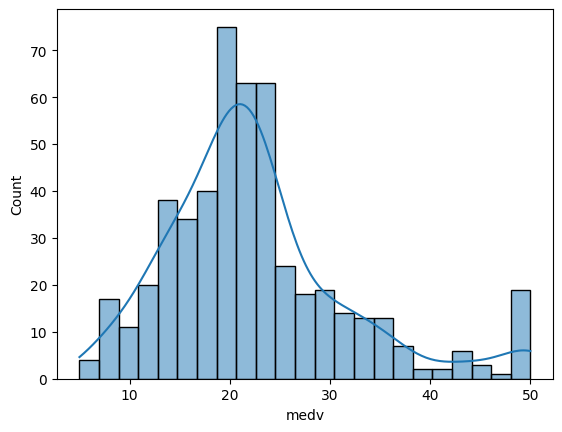

In [274]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.histplot(df,x="medv",kde=True)

<Axes: xlabel='rm', ylabel='Count'>

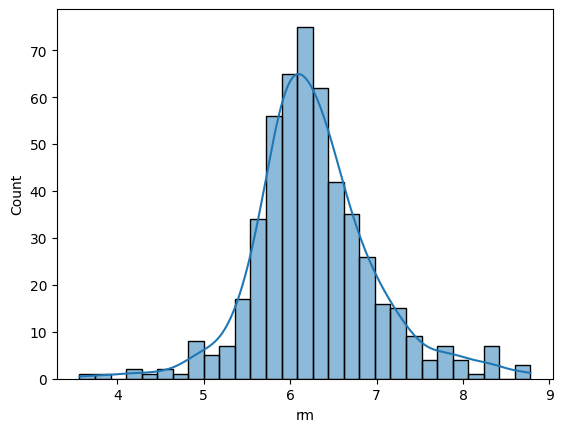

In [275]:
sns.histplot(df, x="rm", kde=True)

<Axes: xlabel='chas', ylabel='medv'>

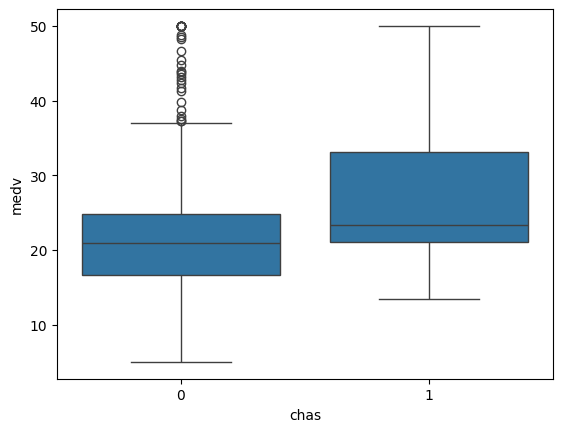

In [276]:
sns.boxplot(data = df, x="chas", y="medv")

In [277]:
q1 = df["crim"].quantile(0.25)
q3 = df["crim"].quantile(0.75)
df["crim_category"] = df["crim"].apply(lambda x: 3 if x>q3 else 2 if x>q1 else 1)

df["crim_category"].unique()

array([1, 2, 3])

<Axes: xlabel='crim_category', ylabel='medv'>

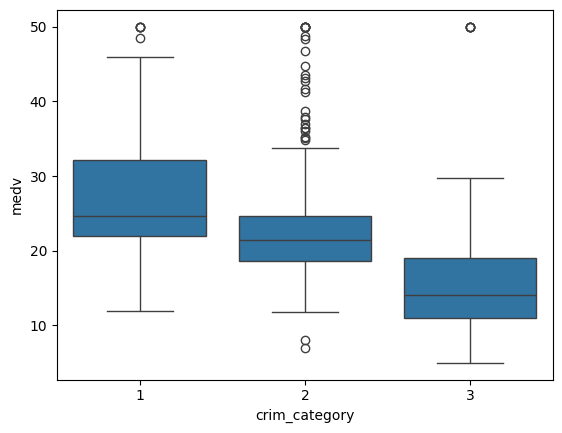

In [278]:
sns.boxplot(df, x="crim_category", y="medv")

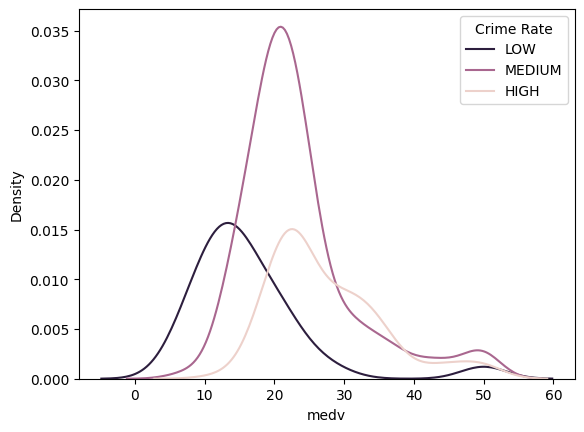

In [279]:
sns.kdeplot(df,x="medv", hue="crim_category")
plt.legend(title="Crime Rate", labels=["LOW", "MEDIUM", "HIGH"])

In [280]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

X = df.drop(columns=["medv"]).values
y = df["medv"].values

In [281]:
X_train, X_test, y_train, y_test = train_test_split(
    X,y, test_size=0.2, random_state=42
)

In [282]:
scalar = StandardScaler()

X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)


In [283]:
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [284]:
y_pred = model.predict(X=X_test)

<Axes: >

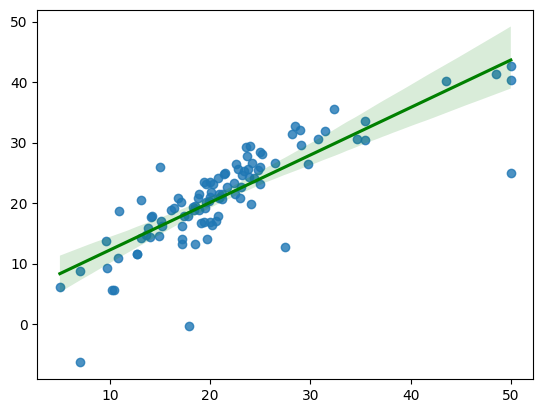

In [285]:
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "green"})

In [286]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import math

mse = mean_squared_error(y_pred, y_test)
rmse = math.sqrt(mse)
r2 = r2_score(y_pred, y_test)
mae = mean_absolute_error(y_pred, y_test)


print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R²): {r2:.4f}")

Mean Squared Error (MSE): 24.2677
Root Mean Squared Error (RMSE): 4.9262
Mean Absolute Error (MAE): 3.2011
R-squared (R²): 0.6324
